In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
p = sns.color_palette()

os.listdir('./')

['.DS_Store',
 '.git',
 '.ipynb_checkpoints',
 '0a67f9edb4915467ac16a565955898d3.dcm',
 '0eb4e3cae3de93e50431cf12bdc6c93d.dcm',
 '0ee5d4356994089451c46f3e918e491e.dcm',
 '1af1f927ac1cfb73967b98620d695532.dcm',
 '1b8a1b8844d5ffa0c36d2184e1e03257.dcm',
 'data_password.txt',
 'Lung_Cancer_Analysis.ipynb',
 'README.md',
 'sample_images',
 'stage1_labels.csv',
 'stage1_sample_submission.csv']

In [5]:
for d in os.listdir('./sample_images'):
    if '.DS_Store' not in d:
        print("Patient '{}' has {} scans".format(d, len(os.listdir('./sample_images/' + d))))
print('----')
print('Total patients {} Total DCM files {}'.format(len(os.listdir('./sample_images')), 
                                                      len(glob.glob('./sample_images/*/*.dcm'))))

Patient '00cba091fa4ad62cc3200a657aeb957e' has 134 scans
Patient '0a099f2549429d29b32f349e95fb2244' has 128 scans
Patient '0a0c32c9e08cc2ea76a71649de56be6d' has 133 scans
Patient '0a38e7597ca26f9374f8ea2770ba870d' has 110 scans
Patient '0acbebb8d463b4b9ca88cf38431aac69' has 203 scans
Patient '0b20184e0cd497028bdd155d9fb42dc9' has 196 scans
Patient '0bd0e3056cbf23a1cb7f0f0b18446068' has 280 scans
Patient '0c0de3749d4fe175b7a5098b060982a1' has 123 scans
Patient '0c37613214faddf8701ca41e6d43f56e' has 164 scans
Patient '0c59313f52304e25d5a7dcf9877633b1' has 244 scans
Patient '0c60f4b87afcb3e2dfa65abbbf3ef2f9' has 136 scans
Patient '0c98fcb55e3f36d0c2b6507f62f4c5f1' has 180 scans
Patient '0c9d8314f9c69840e25febabb1229fa4' has 221 scans
Patient '0ca943d821204ceb089510f836a367fd' has 147 scans
Patient '0d06d764d3c07572074d468b4cff954f' has 435 scans
Patient '0d19f1c627df49eb223771c28548350e' has 183 scans
Patient '0d2fcf787026fece4e57be167d079383' has 126 scans
Patient '0d941a3ad6c889ac451caf

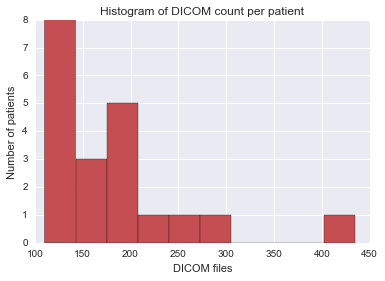

In [9]:
patient_sizes = [len(os.listdir('./sample_images/' + d)) for d in os.listdir('./sample_images') if '.DS_Store' not in d]
plt.hist(patient_sizes, color=p[2])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient')

# Training Set

In [10]:
df_train = pd.read_csv('./stage1_labels.csv')
df_train.head()

,id,cancer
0,0015ceb851d7251b8f399e39779d1e7d,1
1,0030a160d58723ff36d73f41b170ec21,0
2,003f41c78e6acfa92430a057ac0b306e,0
3,006b96310a37b36cccb2ab48d10b49a3,1
4,008464bb8521d09a42985dd8add3d0d2,1


In [11]:
print('Number of training patients: {}'.format(len(df_train)))
print('Cancer rate: {:.4}%'.format(df_train.cancer.mean()*100))

Number of training patients: 1397
Cancer rate: 25.91%


# Naive Submission
Since the evaluation metric used in this competition is LogLoss and not something like AUC, this means that we can often gain an improvement just by aligning the probabilities of our sample submission to that of the training set.
Before I try making a naive submission, I will calculate what the score of this submission would be on the training set to get a comparison.

In [12]:
from sklearn.metrics import log_loss
logloss = log_loss(df_train.cancer, np.zeros_like(df_train.cancer) + df_train.cancer.mean())
print('Training logloss is {}'.format(logloss))

Training logloss is 0.572141489479


In [14]:
sample = pd.read_csv('./stage1_sample_submission.csv')
sample['cancer'] = df_train.cancer.mean()
sample.to_csv('naive_submission.csv', index=False)

# Looking at images

In [15]:
import dicom

ImportError: No module named dicom